<a href="https://colab.research.google.com/github/AlexyNat/ml/blob/main/lab3_2_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Вариант
10. $y = \frac{x_2}{(1 + e^{-x_1})}$

# 1 Сгенерировать с использованием библиотеки pandas csv файл

## Генерирование данных pandas

In [131]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'x1' : np.linspace(-10, 18, 450), 'x2': np.linspace(-3, 15, 450)})
data['y'] = data.x2 / (1 + np.exp(-data.x1))
print(data.head())
print(data.tail())

          x1        x2         y
0 -10.000000 -3.000000 -0.000136
1  -9.937639 -2.959911 -0.000143
2  -9.875278 -2.919822 -0.000150
3  -9.812918 -2.879733 -0.000158
4  -9.750557 -2.839644 -0.000165
            x1         x2          y
445  17.750557  14.839644  14.839643
446  17.812918  14.879733  14.879732
447  17.875278  14.919822  14.919822
448  17.937639  14.959911  14.959911
449  18.000000  15.000000  15.000000


# Создание CSV

In [132]:
data.to_csv(path_or_buf='data.csv', index=False)

# 2 Открыть файл с использованием библиотеки pandas и построить графики

In [133]:
data = pd.read_csv('data.csv')
print(data.head())

          x1        x2         y
0 -10.000000 -3.000000 -0.000136
1  -9.937639 -2.959911 -0.000143
2  -9.875278 -2.919822 -0.000150
3  -9.812918 -2.879733 -0.000158
4  -9.750557 -2.839644 -0.000165


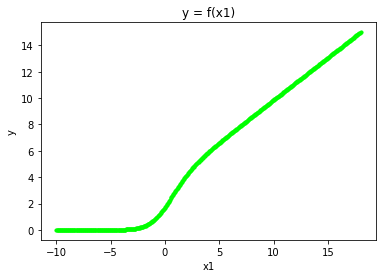

In [134]:
import matplotlib.pyplot as plt

plt.scatter(data.x1, data.y, s=10,color=(0, 1, 0))
plt.title("y = f(x1)")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

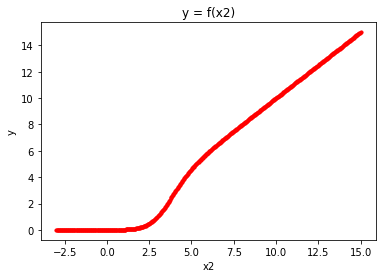

In [135]:
plt.scatter(data.x2, data.y, s=10,color=(1, 0, 0))
plt.title("y = f(x2)")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

# 3 Вывести для каждого столбца: среднее, минимальное и максимальное значения.

In [136]:
print('x1: среднее {}, минимальное {}, максимальное {}'.format(data.x1.mean(), data.x1.min(), data.x1.max()))
print('x2: среднее {}, минимальное {}, максимальное {}'.format(data.x2.mean(), data.x2.min(), data.x2.max()))
print('y: среднее {}, минимальное {}, максимальное {}'.format(data.y.mean(), data.y.min(), data.y.max()))

x1: среднее 4.0, минимальное -10.0, максимальное 18.0
x2: среднее 6.0, минимальное -3.0, максимальное 15.0
y: среднее 5.889303546380115, минимальное -0.0011396393254147, максимальное 14.999999771550309


# 4 Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднего $x_1$ или $x_2$ меньше среднее $x_2$


## Создаем новый DataFrame из старого

In [137]:
data1 = data[(data.x1 < data.x1.mean()) | (data.x2 < data.x2.mean())]
print(data1.head())
print(data1.tail())

          x1        x2         y
0 -10.000000 -3.000000 -0.000136
1  -9.937639 -2.959911 -0.000143
2  -9.875278 -2.919822 -0.000150
3  -9.812918 -2.879733 -0.000158
4  -9.750557 -2.839644 -0.000165
           x1        x2         y
220  3.719376  5.819599  5.681820
221  3.781737  5.859688  5.729160
222  3.844098  5.899777  5.776135
223  3.906459  5.939866  5.822761
224  3.968820  5.979955  5.869055


## Сохраняем в csv формате

In [138]:
data1.to_csv(path_or_buf='data1.csv', index=False)

# 5 С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

In [139]:
data = pd.read_csv('data1.csv')
print(data.head())

          x1        x2         y
0 -10.000000 -3.000000 -0.000136
1  -9.937639 -2.959911 -0.000143
2  -9.875278 -2.919822 -0.000150
3  -9.812918 -2.879733 -0.000158
4  -9.750557 -2.839644 -0.000165


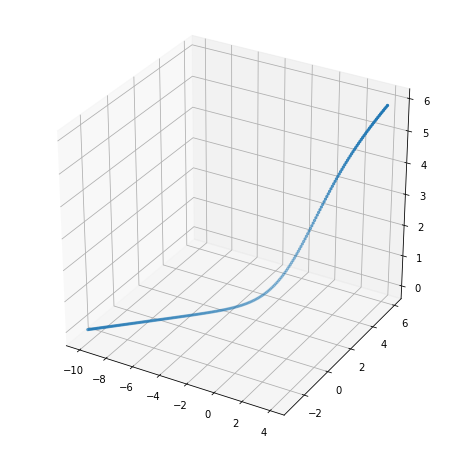

In [140]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.x1, data.x2, data.y, s=5)